## Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
aapl_df = pd.read_csv("AAPL - Clean.csv")
bikes_df = pd.read_csv("BikeCounter - Clean.csv")
sensor_df = pd.read_csv("sensor - clean.csv")

(Data has already been cleaned with null values handled)

## Sensor Data Decomposed

In [3]:
sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])
sensor_df.set_index('timestamp',inplace=True)
sensor_df.head()

,sensor_03
timestamp,
2018-04-01 00:00:00,46.310760
2018-04-01 01:00:00,46.006943
2018-04-01 02:00:00,45.833332
2018-04-01 03:00:00,45.312500
2018-04-01 04:00:00,45.182289


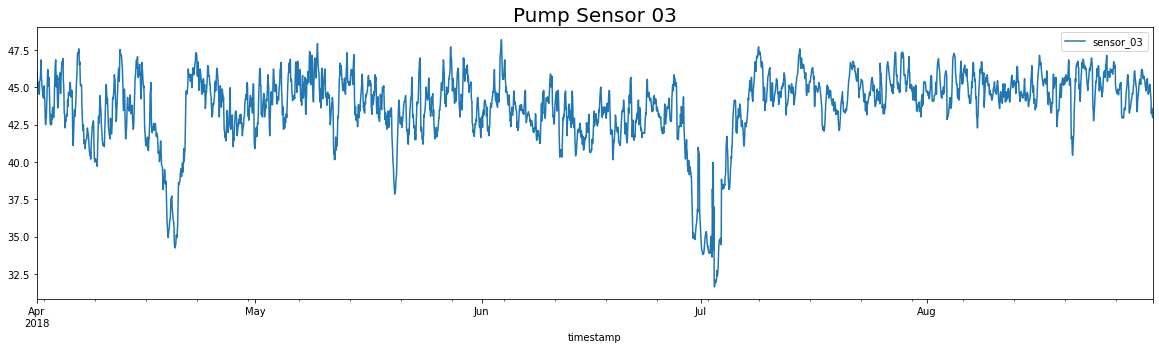

In [4]:
sensor_df.plot(figsize=(20,5))
plt.title("Pump Sensor 03", size = 20)
plt.show()

In [5]:
sensor_decomposed = seasonal_decompose(sensor_df, model = 'additive')

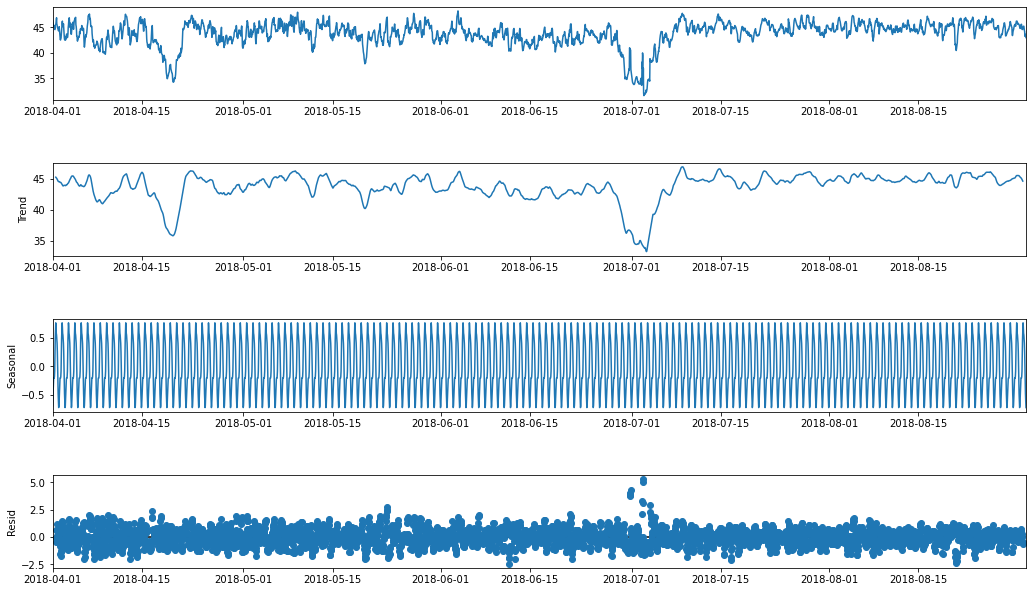

In [6]:
fig = sensor_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

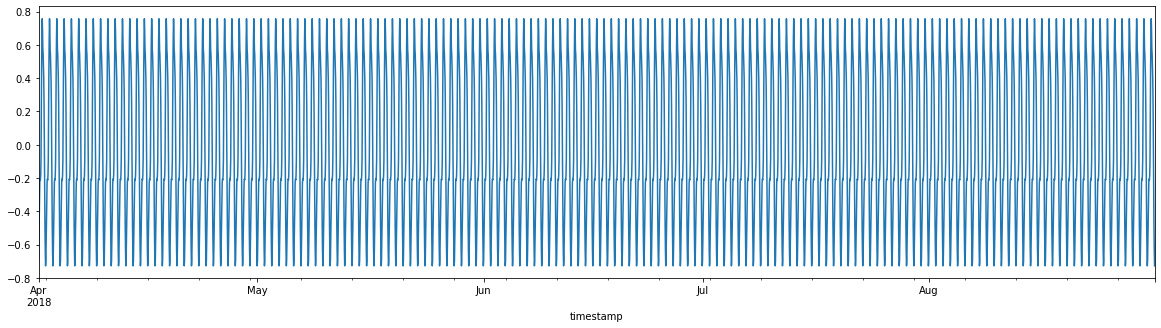

In [7]:
sensor_decomposed.seasonal.plot(figsize=(20,5))
plt.show()

In [8]:
sensor_df = sensor_df.resample('D').mean()

In [9]:
sensor_decomposed = seasonal_decompose(sensor_df, model = 'additive')

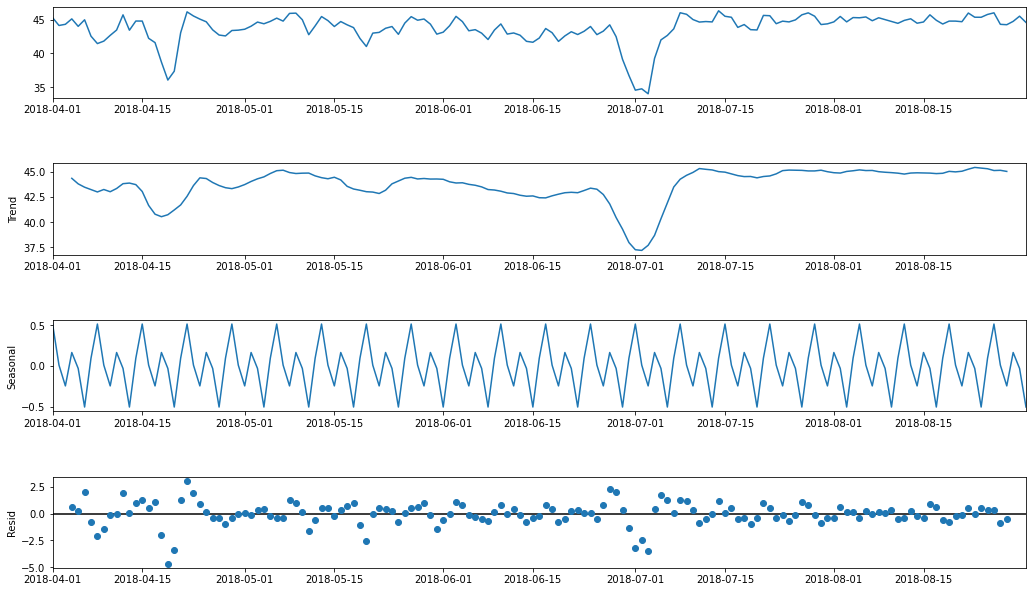

In [10]:
fig = sensor_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

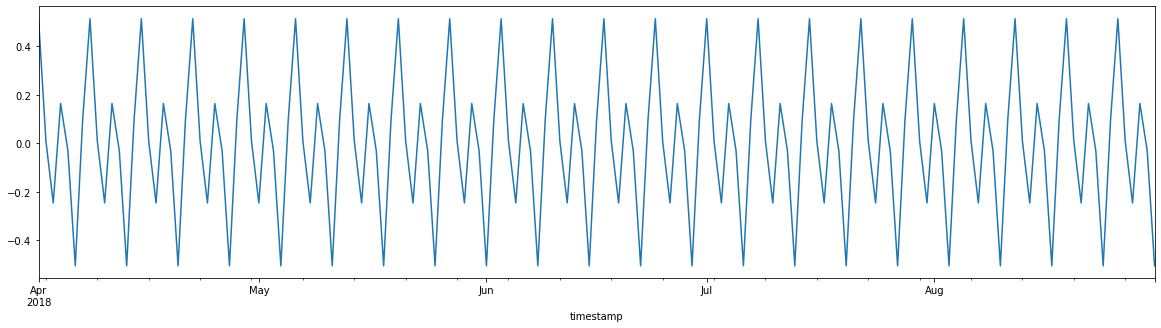

In [11]:
sensor_decomposed.seasonal.plot(figsize=(20,5))
plt.show()

## Fremont Bike Counter Decomposed

In [12]:
bikes_df['Date'] = pd.to_datetime(bikes_df['Date'])
bikes_df.set_index('Date',inplace=True)
bikes_df.head()

,Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0


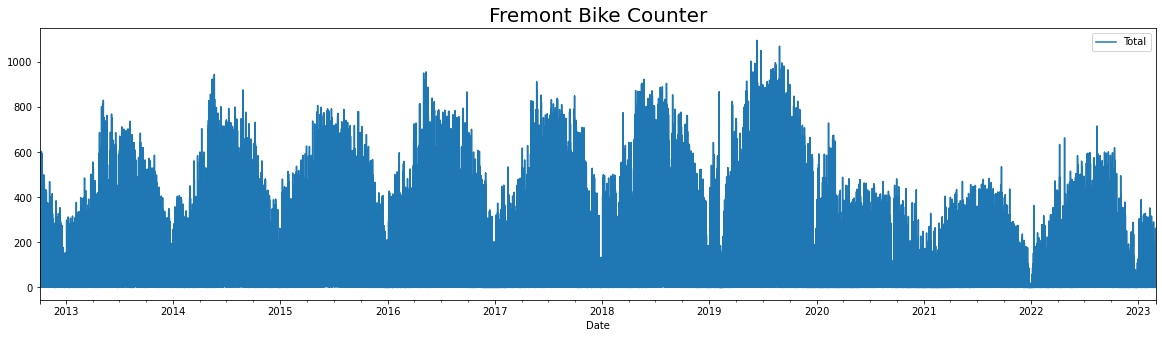

In [13]:
bikes_df.plot(figsize=(20,5))
plt.title("Fremont Bike Counter", size = 20)
plt.show()

In [14]:
bikes_decomposed = seasonal_decompose(bikes_df, model='addititve')

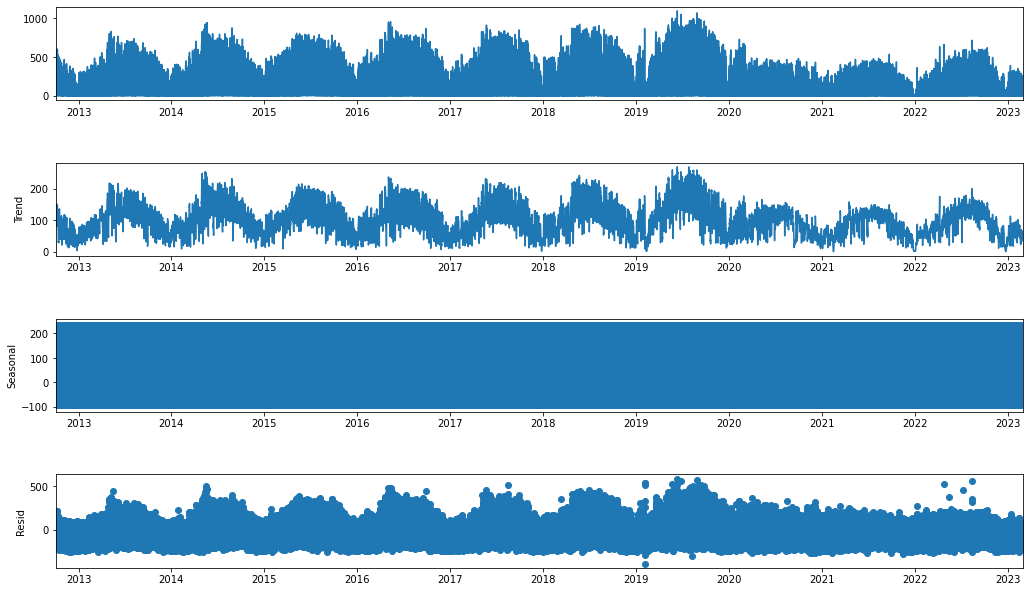

In [15]:
fig = bikes_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

In [16]:
bikes_df = bikes_df.resample('M').sum()
bikes_df.head()

,Total
Date,
2012-10-31,65695.0
2012-11-30,50647.0
2012-12-31,36369.0
2013-01-31,44884.0
2013-02-28,50027.0


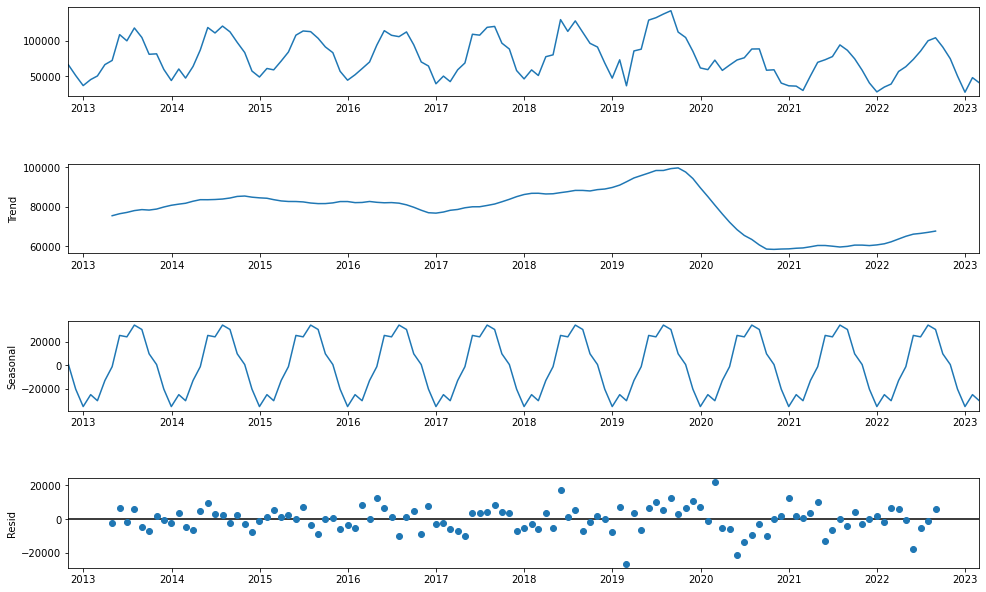

In [17]:
bikes_decomposed = seasonal_decompose(bikes_df, model='addititve')
fig = bikes_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

## AAPL Decomposition

In [18]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date',inplace=True)
aapl_df.head()

,Close
Date,
2006-01-03,10.68
2006-01-04,10.71
2006-01-05,10.63
2006-01-06,10.90
2006-01-09,10.86


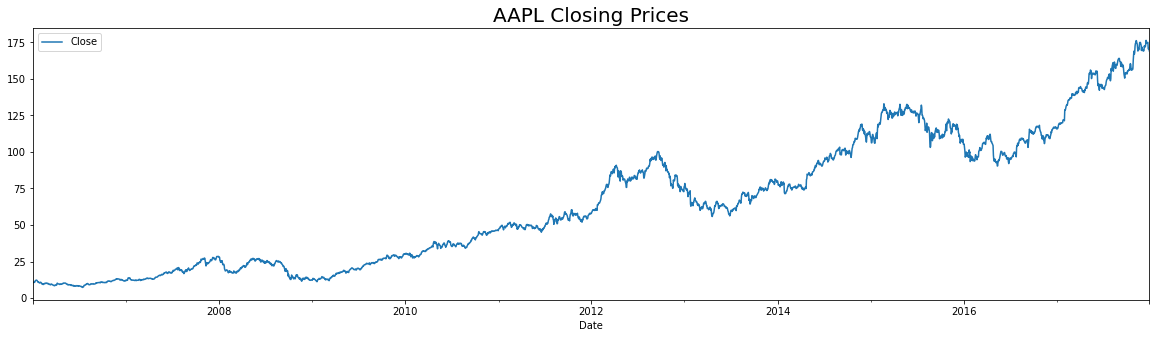

In [19]:
aapl_df.plot(figsize=(20,5))
plt.title("AAPL Closing Prices", size = 20)
plt.show()

In [20]:
aapl_df = aapl_df.resample('M').mean()

In [21]:
aapl_decomposed = seasonal_decompose(aapl_df,model='additive')

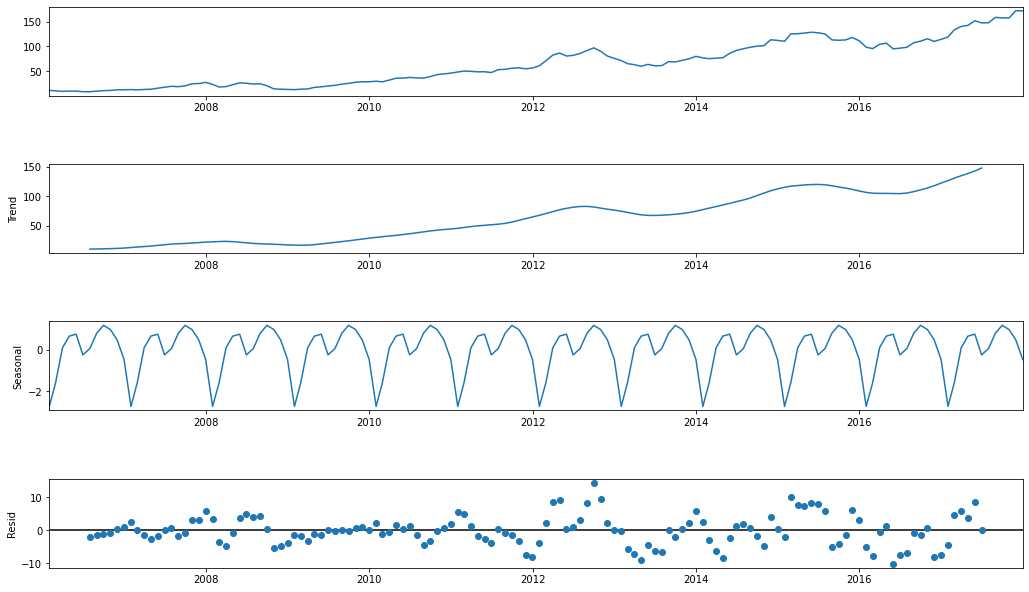

In [22]:
fig = aapl_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

## Hodrick Prescott Filter

HP filter is a smoothing filter that can separate short-term cyclic variations from long-term trends

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [24]:
sensor_df = pd.read_csv('sensor - clean.csv')
sensor_df.set_index('timestamp',inplace=True)
sensor_df.head()

,sensor_03
timestamp,
2018-04-01 00:00:00,46.310760
2018-04-01 01:00:00,46.006943
2018-04-01 02:00:00,45.833332
2018-04-01 03:00:00,45.312500
2018-04-01 04:00:00,45.182289


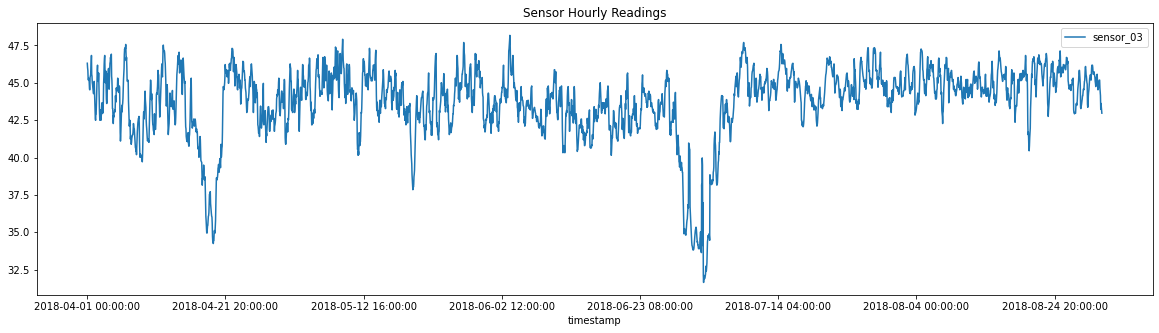

In [25]:
sensor_df.plot(figsize=(20,5))
plt.title("Sensor Hourly Readings")
plt.show()

In [26]:
sensor_cyclic, sensor_trend = hpfilter(sensor_df)

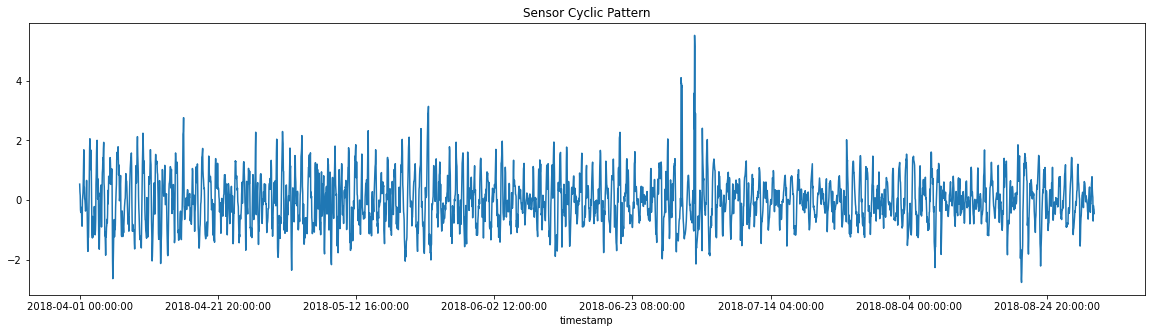

In [27]:
sensor_cyclic.plot(figsize=(20,5))
plt.title("Sensor Cyclic Pattern")
plt.show()

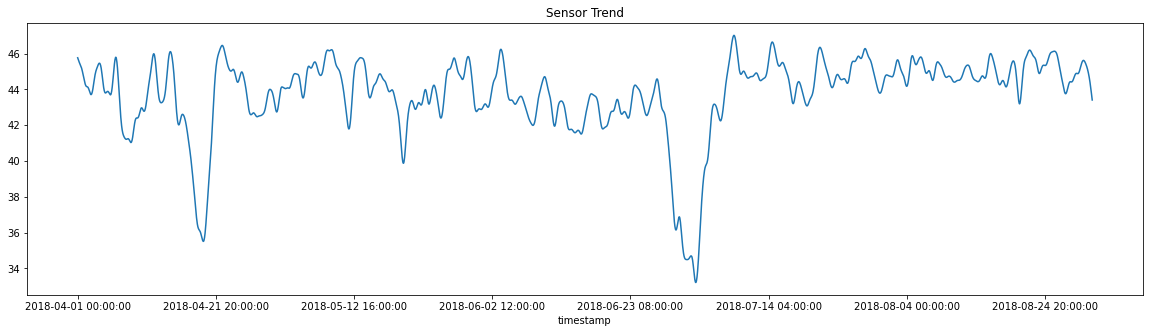

In [28]:
sensor_trend.plot(figsize=(20,5))
plt.title('Sensor Trend')
plt.show()